# Analysis on Attrition in IBM

Employee Attrition is one of the most important factors that affect the company in the market in terms of company reputation, company budget and market value. If an employee decide to leave the company, the respective company has to invest hiring new people and wasting time.

In this project we try to classify to predict what cause an employee to leave the company. Getting an idea about the most important factors that lead to employee attrition will compel a company to improve the concerned parameter by benchmarking or any other process.
We also try to find out the performance of the classifier models ; so we have a script that can be sold to a company for a price to improve their Attrition rate. They can use the same script to benchmark performance over time.
This dataset is a fictional dataset provided by IBM which i got from Kaggle.

We will Use Data science experience desktop for this project

# Load Dataset

In [1]:
# The code was removed by DSX for sharing.

,﻿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Employee Attrition in IBM

In [2]:
attrition.dtypes

﻿Age                         int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

All the features represented by columns are self expanatory

In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Mapping of Categorical Features To Numerical Features

In [56]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
target_map1 = {'Single':0, 'Married':1, 'Divorced':2}
target_map2 = {'Male':0, 'Female':1}
target_map3 = {'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2}
target_map4 = {'Sales':0, 'Research & Development':1, 'Human Resources':2}

# Use the pandas apply method to numerically encode our attrition target variable
#attrition["Attrition_numerical"] = attrition["Attrition"].apply(lambda x: target_map[x])
attrition["MaritalStatus_numerical"] = attrition["MaritalStatus"].apply(lambda x: target_map1[x])
attrition["OverTime_numerical"] = attrition["OverTime"].apply(lambda x: target_map[x])
attrition["Gender_numerical"] = attrition["Gender"].apply(lambda x: target_map2[x])
attrition["BusinessTravel_numerical"] = attrition["BusinessTravel"].apply(lambda x: target_map3[x])
attrition["Department_numerical"] = attrition["Department"].apply(lambda x: target_map4[x])
attrition["Attrition_numerical"] = attrition["Attrition"].apply(lambda x: target_map[x])
#del attrition["Attrition"]
attrition.dtypes

﻿Age                         int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## Dividing the Dataset into Numerical and Categorical Datasets

In [57]:
data=attrition.copy()
target = "Attrition"
feature_by_dtype = {}
for c in data.columns:
    
    if c == target: continue
    
    data_type = str(data[c].dtype)
    
    if data_type not in feature_by_dtype.keys():
         feature_by_dtype[data_type] = [c]
    else:
        feature_by_dtype[data_type].append(c)

feature_by_dtype
feature_by_dtype.keys()

['object', 'int64']

In [5]:
attrition.describe().T

,count,mean,std,min,25%,50%,75%,max
﻿Age,1470,36.923810,9.135373,18,30.00,36.0,43.00,60
DailyRate,1470,802.485714,403.509100,102,465.00,802.0,1157.00,1499
DistanceFromHome,1470,9.192517,8.106864,1,2.00,7.0,14.00,29
Education,1470,2.912925,1.024165,1,2.00,3.0,4.00,5
EmployeeCount,1470,1.000000,0.000000,1,1.00,1.0,1.00,1
EmployeeNumber,1470,1024.865306,602.024335,1,491.25,1020.5,1555.75,2068
EnvironmentSatisfaction,1470,2.721769,1.093082,1,2.00,3.0,4.00,4
HourlyRate,1470,65.891156,20.329428,30,48.00,66.0,83.75,100
JobInvolvement,1470,2.729932,0.711561,1,2.00,3.0,3.00,4
JobLevel,1470,2.063946,1.106940,1,1.00,2.0,3.00,5


We will remove all the redundant colums as done before as all of the rows in columns ["Over18", "StandardHours", "EmployeeCount"] have no distinct values. Also Employee count does not matter in this data as it is a figure from 1 :1500

In [58]:
objects = feature_by_dtype["object"]
remove = ["Over18"]
categorical_features = [f for f in objects if f not in remove]
int64s = feature_by_dtype["int64"]
remove.append("StandardHours")
remove.append("EmployeeCount")
count_features = []
for i in [i for i in int64s if len(data[i].unique()) < 20 and i not in remove]:
    count_features.append(i)
count_features = count_features + ["TotalWorkingYears", "YearsAtCompany", "HourlyRate"]
remove.append("EmployeeNumber")
numerical_features = [i for i in int64s if i not in remove]
d=data[numerical_features]
d.head()

,﻿Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MaritalStatus_numerical,OverTime_numerical,Gender_numerical,BusinessTravel_numerical,Department_numerical,Attrition_numerical
0,41,1102,1,2,2,94,3,2,4,5993,...,6,4,0,5,0,1,1,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,10,7,1,7,1,0,0,2,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,1,0,1,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,8,7,3,0,1,1,1,2,1,0
4,27,591,2,1,1,40,3,1,2,3468,...,2,2,2,2,1,0,0,1,1,0


In [15]:
d.columns #Getting the numerical columns for further processing

Index([u'﻿Age', u'DailyRate', u'DistanceFromHome', u'Education',
       u'EnvironmentSatisfaction', u'HourlyRate', u'JobInvolvement',
       u'JobLevel', u'JobSatisfaction', u'MonthlyIncome', u'MonthlyRate',
       u'NumCompaniesWorked', u'PercentSalaryHike', u'PerformanceRating',
       u'RelationshipSatisfaction', u'StockOptionLevel', u'TotalWorkingYears',
       u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
       u'YearsInCurrentRole', u'YearsSinceLastPromotion',
       u'YearsWithCurrManager', u'MaritalStatus_numerical',
       u'OverTime_numerical', u'Gender_numerical', u'BusinessTravel_numerical',
       u'Department_numerical', u'Attrition_numerical'],
      dtype='object')

# Data Visualization

### Employees who stay have more job satisfication than employees lost in attrition

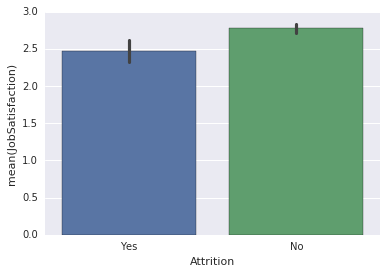

In [144]:
#sns.set_context("notebook")
sns.barplot(y="JobSatisfaction", x="Attrition", data=attrition)

### Employees lost in attrition tend to have lower monthly average income on average than those who stay

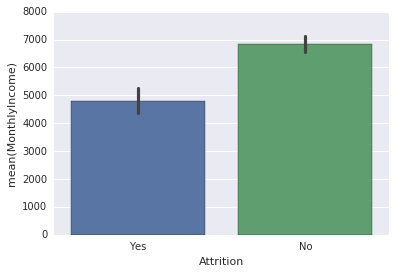

In [145]:
sns.barplot(y="MonthlyIncome", x="Attrition", data=attrition)

### Male have higher level of  Attrition as relative to Female

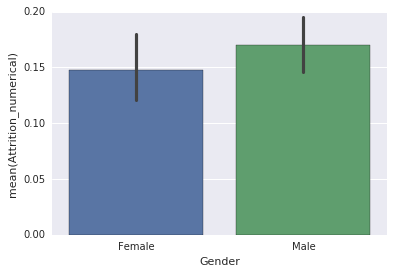

In [146]:
sns.barplot(y="Attrition_numerical", x="Gender", data=attrition)

### Employees who stay tend to have more stock options than those lost in attrition

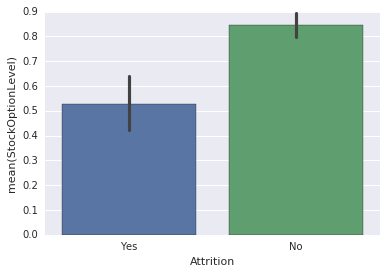

In [147]:
sns.barplot(y="StockOptionLevel", x="Attrition", data=attrition)

### Single people, followed by married people are more likely to leave the company as relative to people who are divorced

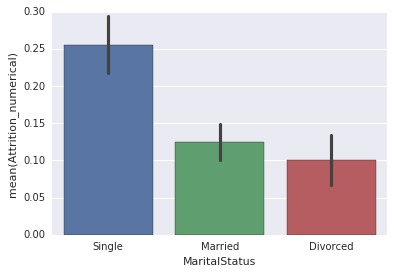

In [148]:
sns.barplot(y="Attrition_numerical", x="MaritalStatus", data=attrition)

### Employees lost in attrition tend to be lower in job level than those who stay.

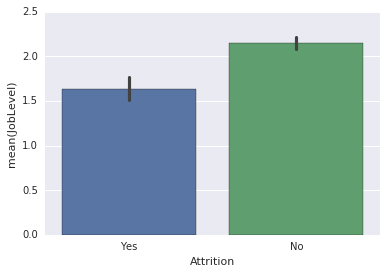

In [149]:
sns.barplot(y="JobLevel", x="Attrition", data=attrition)

### Employee working overtime are more likely to leave the company relative to the people who don't work overtime

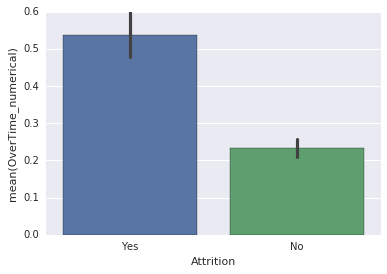

In [150]:
sns.barplot(y="OverTime_numerical", x="Attrition", data=attrition)

### Employees lost in attrition tend to have longer commute distances than those who stay.

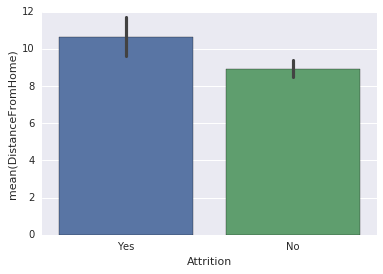

In [151]:
sns.barplot(y="DistanceFromHome", x="Attrition", data=attrition)

### Employee lost in attrition are less involved with their jobs on average than those who stay.

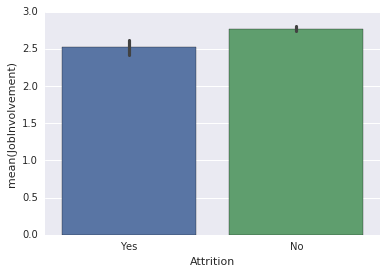

In [152]:
sns.barplot(y="JobInvolvement", x="Attrition", data=attrition)

In [153]:
df= attrition.copy()

# Correlation Matrix

In [18]:
import numpy as np
import pandas
from pandas import DataFrame, Series
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
#creating a list of only numerical values
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
       u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
       u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
       u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
       u'StockOptionLevel', u'TotalWorkingYears',
       u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
       u'YearsInCurrentRole', u'YearsSinceLastPromotion',
       u'YearsWithCurrManager']
attrition= attrition.reindex(columns=numerical)
data = [go.Heatmap(z= attrition[numerical].astype(float).corr().values, # Generating correlation
        x=attrition[numerical].columns.values,
        y=attrition[numerical].columns.values) ]
layout = go.Layout(
    title='Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

# High Correlations
The purpose of showing it is to verify that we need to do PCA in the future to find the most relevant columns/ features in the dataset 

In [19]:
attrition.loc[:,['PerformanceRating','PercentSalaryHike']].corr()

,PerformanceRating,PercentSalaryHike
PerformanceRating,1.00000,0.77355
PercentSalaryHike,0.77355,1.00000


In [20]:
attrition.loc[:,['YearsWithCurrManager','YearsAtCompany']].corr()

,YearsWithCurrManager,YearsAtCompany
YearsWithCurrManager,1.000000,0.769212
YearsAtCompany,0.769212,1.000000


In [21]:
attrition.loc[:,['YearsWithCurrManager','YearsInCurrentRole']].corr()

,YearsWithCurrManager,YearsInCurrentRole
YearsWithCurrManager,1.000000,0.714365
YearsInCurrentRole,0.714365,1.000000


In [22]:
attrition.loc[:,['YearsAtCompany','YearsInCurrentRole']].corr()


,YearsAtCompany,YearsInCurrentRole
YearsAtCompany,1.000000,0.758754
YearsInCurrentRole,0.758754,1.000000


In [161]:
df=attrition.copy()

# Finding the most Important Features in the dataset

## Getting Eigenvalues, and Eigenvectors

In [26]:
# Getting The most Important Features of the dataset
import pandas as pd
X= d.ix[:, d.columns != 'Attrition_numerical'].values
y = d.ix[:,-1].values
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)          # Standardizing the numerical columns to remove scalability effects
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)   #Calculating Covariance matrix
#print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))
# Getting the eigenvalues and the eigenvectors for PCA analysis
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)   

#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)


## Methods to find most important Features

### Method 1 : Discard all Features which have eigenvalues less than 1


In [27]:
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[ 4.6745871   1.84670402  1.77175378  1.67942949  0.04712242  0.14124955
  0.20131863  0.22433458  0.27937593  0.3266856   0.51840561  0.53395932
  0.74279885  1.17563535  1.15256151  0.84603212  0.87936965  1.10140467
  1.07550891  1.06555275  0.90690682  0.92143365  0.91490819  0.96452708
  0.97973287  1.02565574  1.01831216  1.00379423]


We have 15 factors whose eigenvalues are less than 1. How ever there are 5 factors whose eigenvalues are greater than 0.9. Hence this method shall not be implemented.

### Method 2 : Plotting Scree Plot

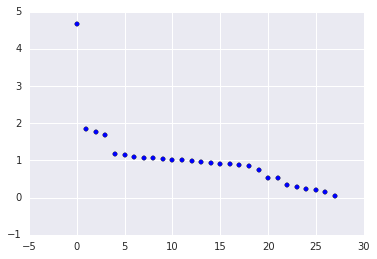

In [65]:
import matplotlib.pyplot as plt
import numpy as np
x=[i for i in range(28)]
e=np.sort(eig_vals)[::-1]
eigenvalues= e.tolist()
plt.scatter(x,eigenvalues)

The scree plot suggests that there are 2 elbows, one at 4, another at 22 as the slope levels off twice. It gives us some idea about number of features to be selected but to be sure we use the third method

### Method 3 Getting Variance Explained by each Feature

In [66]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

#Getting Variance Explained by each of the categorical column
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
var_exp


[16.683596829110783,
 6.590884856139982,
 6.323387535765133,
 5.9938822044592195,
 4.1958414127334605,
 4.1134908942959232,
 3.9309122030966246,
 3.8384902601591739,
 3.8029567171787266,
 3.6605643531560581,
 3.6343551248031245,
 3.582540630488837,
 3.4966656690209068,
 3.4423961987289315,
 3.2885958048230033,
 3.2653064275037815,
 3.2367495517219784,
 3.1384694411324126,
 3.0194878015746314,
 2.6510483667396509,
 1.9057002814440127,
 1.8501891308078882,
 1.165940603413312,
 0.99709241481019861,
 0.80064989548965826,
 0.71850599927596204,
 0.50411952066000432,
 0.16817987146663949]

### Plot of Variance Explained by each Principal Component

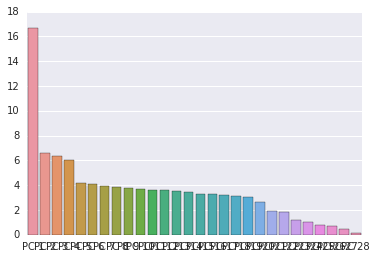

In [67]:
#sns.set_context("notebook")
sns.barplot(x=['PC %s' %i for i in sorted(range(1,29))], y= var_exp)

## Cumulative Variance explained by each Principal Component

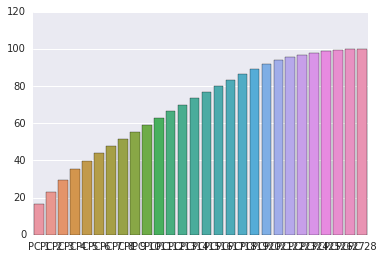

In [69]:
cum_var_exp = np.cumsum(var_exp)
#cum_var_exp
sns.barplot(x=['PC %s' %i for i in range(1,29)], y=cum_var_exp)
#plt.show()

In [70]:
cum_var_exp

array([  16.68359683,   23.27448169,   29.59786922,   35.59175143,
         39.78759284,   43.90108373,   47.83199594,   51.6704862 ,
         55.47344291,   59.13400727,   62.76836239,   66.35090302,
         69.84756869,   73.28996489,   76.57856069,   79.84386712,
         83.08061667,   86.21908611,   89.23857392,   91.88962228,
         93.79532256,   95.64551169,   96.8114523 ,   97.80854471,
         98.60919461,   99.32770061,   99.83182013,  100.        ])

 We will divide our features into 2 pca features
 85% variability explained which is explained by 18 Principal Components which is confirmed by the graph. So we will use number of components as 18
 90% variability explained which is explained by 20 Principal Components which is confirmed by the graph. So we will use number of components as 20
 We will compare the accuracy on the models using these 2 divisions

# Reopening the file in Spark

In [1]:
# The code was removed by DSX for sharing.

We will remove all the redundant colums as done before as all of the rows in columns ["Over18", "StandardHours", "EmployeeCount"] have no distinct values. Also Employee count does not matter in this data as it is a figure from 1 :1500

In [2]:
remove= ["Over18", "StandardHours", "EmployeeCount", "EmployeeNumber"]
data= data.select([column for column in data.columns if column not in remove])
data.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- OverTime: string (nullable = true)
 |-- PercentSalaryHike: integer (nullable = true)
 |-- PerformanceRating: integer (nullable = true)
 |-- Relation

## Tuning the data

We will use StringIndexer and OneHotEncoder to index the categorical columns and convert them into sparsevectors using OneHotEncoder
We will use Vector Assembler to assemble the numerical features with the categorical ones
Standard Scaler is used to normalize the Features to remove scalability defects with mean 0 and standard deviation 1 
Pipeline is used to organize them at one place

In [3]:
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder, StandardScaler
from pyspark.ml import Pipeline
category_col = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']  
stages = []
for category in category_col:
    indexer = StringIndexer(inputCol=category, outputCol=category + 'new')                       #Converting into Sparse vectors for each categorical column
    encoder = OneHotEncoder(inputCol=category +"new", outputCol=category +"classVec")
    stages += [indexer, encoder]
#indexed.toPandas()
label= StringIndexer(inputCol = "Attrition", outputCol = "label")                                 # Converting Attrition to Label Numerical
stages += [label]
numeric_Cols = ["Age", "DailyRate", "DistanceFromHome", "Education","EnvironmentSatisfaction", "HourlyRate",
               "JobInvolvement", "JobLevel","JobSatisfaction",
               "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike",
               "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel",
               "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", 
               "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]
assemblerInputs = map(lambda c: c + "classVec", category_col) + numeric_Cols
#assemblerInputs = category_col + numeric_Cols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")                     # Assembling all the vectors into a vector type array
stages += [assembler]
scaler = StandardScaler(inputCol="features", outputCol="std_features",
                        withStd=True, withMean=False)                                            # Normalizing the vectors
stages += [scaler]
pipeline = Pipeline(stages=stages)
pipelineModel = pipeline.fit(data)
dataset = pipelineModel.transform(data)
#data_vectors = dataset.select(dataset['features'])
#data_vectors.show(truncate = False)
#df2 = data_vectors.toPandas()
get= ["label","features", "std_features"]
data_features= dataset.select([column for column in dataset.columns if column in get])           # Selecting the relevant columns
data_features.printSchema()
#data_features.show(2, truncate= False)
data_features.toPandas()

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- std_features: vector (nullable = true)



,label,features,std_features
0,1,"(1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(2.20198052463, 0.0, 0.0, 2.17446367769, 2.030..."
1,0,"[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 2.55628610223, 2.10111092176, 0.0, 2.030..."
2,1,"(1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","(2.20198052463, 0.0, 2.10111092176, 0.0, 0.0, ..."
3,0,"(0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 2.55628610223, 2.10111092176, 0.0, 2.030..."
4,0,"[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[2.20198052463, 0.0, 2.10111092176, 0.0, 0.0, ..."
5,0,"(0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 2.55628610223, 2.10111092176, 0.0, 2.030..."
6,0,"(1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(2.20198052463, 0.0, 2.10111092176, 0.0, 0.0, ..."
7,0,"(1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(2.20198052463, 0.0, 2.10111092176, 0.0, 2.030..."
8,0,"(0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 2.55628610223, 2.10111092176, 0.0, 2.030..."
9,0,"[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[2.20198052463, 0.0, 2.10111092176, 0.0, 0.0, ..."


We will have 2 sets of features in order to compare with the models, we have PCA features 1 which incorporate 18 features and PCA features 2 which incorporate 20 features. These features has been selected  using cumulative variance explained before

In [9]:
from pyspark.ml.feature import PCA
pca_1 = PCA(k=18, inputCol="std_features", outputCol="pcaFeatures1")
pca_2 = PCA(k=20, inputCol="std_features", outputCol="pcaFeatures2")
model_1 = pca_1.fit(data_features).transform(data_features)
model_2 = pca_2.fit(model_1).transform(model_1)
#result= model_2.select("pcaFeatures2")
#result.show(truncate= False)

## Unbalanced Dataset
We will see number of No for attrition in the dataset is at least 5 times number of yes'es. We can put the two sample types on the same footing using stratified sampling. The DataFrames sampleBy() function does this when provided with fractions of each sample type to be returned.

In [10]:
model_2.groupby('label').count().toPandas()

,label,count
0,0,1233
1,1,237


Here we're keeping all instances of the Attrition="Yes" class which is denoted by Label= 1, but downsampling the Churn=False class to a fraction of 237/1233.

In [11]:
stratified_model2 = model_2.sampleBy('label', fractions={0: 237./1233, 1: 1.0}).cache()
stratified_model2.groupby('label').count().toPandas()

,label,count
0,0,218
1,1,237


# Decision Tree classifier

In [36]:
from pyspark.ml.classification import DecisionTreeClassifier
(trainingData1, testData1) = stratified_model2.randomSplit([0.8, 0.2], seed=100)
dt = DecisionTreeClassifier(labelCol="label", featuresCol="pcaFeatures1", maxDepth=10)
dtModel = dt.fit(trainingData1)
predictions = dtModel.transform(testData1)
#print(dtModel.toDebugString)

In [18]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1") ## with f1
accuracy = evaluator.evaluate(predictions)
print ("Test Error = %g" % (1.0 - accuracy))
print ("Test Accuracy = %g" % ( accuracy))

Test Error = 0.421869
Test Accuracy = 0.578131


In [24]:
dt2 = DecisionTreeClassifier(labelCol="label", featuresCol="pcaFeatures2", maxDepth=10)
dt2Model = dt2.fit(trainingData1)
predictions_2 = dt2Model.transform(testData1)
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1") ## with accuracy
accuracy = evaluator.evaluate(predictions_2)
print ("Test Error = %g" % (1.0 - accuracy))
print ("Test Accuracy = %g" % ( accuracy))

Test Error = 0.401718
Test Accuracy = 0.598282


Hence PCA with number of features= 20 have slightly better result than n=18. Let us tune the decision tree to find the best decision tree for this data

### Tuning Decision Tree
We would like to determine which parameter values of the decision tree produce the best model.This task of model selection is done using K fold cross validation techniques where the data is randomly split into k partitions. Each partition is used once as the testing data set, while the rest are used for training. Models are then generated using the training sets and evaluated with the testing sets, resulting in k model performance measurements. The average of the performance scores is often taken to be the overall score of the model, given its build parameters.
The cross validator will use the ParamGridBuilder to iterate through the maxDepth parameter of the decision tree and evaluate the models using the F1-score, repeating 4 times per parameter value for reliable results.

In [28]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
#Train a DecisionTree model
dTree = DecisionTreeClassifier(labelCol='label', featuresCol='pcaFeatures2')
# Search through decision tree's maxDepth parameter for best model
paramGrid = ParamGridBuilder().addGrid(dTree.maxDepth, [2,3,4,5,6,7,8,9,10]).build()
# Set F-1 score as evaluation metric for best model selection
evaluator = MulticlassClassificationEvaluator(labelCol='label',
                                              predictionCol='prediction', metricName='f1')
# Set up 3-fold cross validation
crossval = CrossValidator(estimator=dTree,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=4)
CV_model = crossval.fit(trainingData1)

# Fetch best model
tree_model = CV_model.bestModel
print tree_model

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_4dcda22412b81ee95081) of depth 4 with 25 nodes


We find that the best tree model produced using the cross-validation process is one with a depth of 4 with 25 nodes. The decision trees with higher depth will result into overfitting of the data

In [37]:
dt3 = DecisionTreeClassifier(labelCol="label", featuresCol="pcaFeatures2", maxDepth=4)
dt3Model = dt3.fit(trainingData1)
predictions_5 = dt3Model.transform(testData1)
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1") ## with accuracy
accuracy = evaluator.evaluate(predictions_5)
print ("Test Error = %g" % (1.0 - accuracy))
print ("Test Accuracy = %g" % ( accuracy))

Test Error = 0.435426
Test Accuracy = 0.564574


In [38]:
print(dt3Model.toDebugString)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_4412bea0a7d90440babe) of depth 4 with 25 nodes
  If (feature 1 <= -2.6806434183396624)
   If (feature 14 <= 3.5436710252888726)
    If (feature 17 <= -3.937451955827704)
     If (feature 7 <= 3.6794174677839697)
      Predict: 0.0
     Else (feature 7 > 3.6794174677839697)
      Predict: 1.0
    Else (feature 17 > -3.937451955827704)
     If (feature 6 <= 1.6726962499249938)
      Predict: 1.0
     Else (feature 6 > 1.6726962499249938)
      Predict: 0.0
   Else (feature 14 > 3.5436710252888726)
    Predict: 0.0
  Else (feature 1 > -2.6806434183396624)
   If (feature 14 <= 1.6583948086028861)
    If (feature 11 <= 2.3894973151451433)
     If (feature 4 <= -6.799782927081132)
      Predict: 1.0
     Else (feature 4 > -6.799782927081132)
      Predict: 0.0
    Else (feature 11 > 2.3894973151451433)
     If (feature 12 <= -0.5452805128672591)
      Predict: 0.0
     Else (feature 12 > -0.5452805128672591)
      Predict: 1.0
   El

Accuracy is lower than the decision tree of depth 10; but this decision tree makes sure that the model is not overfitted to the data. Since the accuracy is below 60% we will leave all the classifiers which are weak learners. In other words we need a group of decision trees which ensemble together to give us a better accuracy scores

## Random Forest Classifier

In [15]:
from pyspark.ml.classification import RandomForestClassifier
# Train a RandomForest model.
rf_1 = RandomForestClassifier(labelCol="label", featuresCol="pcaFeatures1", numTrees=10)
model = rf_1.fit(trainingData1)
# Make predictions.
predictions_3 = model.transform(testData1)
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions_3)
print ("Test Accuracy = %g" % ( accuracy))
print ("Test Error = %g" % (1.0 - accuracy))

Test Accuracy = 0.701031
Test Error = 0.298969


we  straightaway get better accuracy score of 70 % which is at least 12% higher than the standalone decision tree which validates that ensemble methods are mandatory for this dataset to predict the attrition of an employee

In [16]:
# Train a RandomForest model.
rf_2 = RandomForestClassifier(labelCol="label", featuresCol="pcaFeatures2", numTrees=10)
model_2 = rf_2.fit(trainingData1)
# Make predictions.
predictions_4 = model_2.transform(testData1)
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions_4)
print ("Test Accuracy = %g" % ( accuracy))
print ("Test Error = %g" % (1.0 - accuracy))

Test Accuracy = 0.659794
Test Error = 0.340206


Here we see that PCA features 1 produce better accuracy score than PCA features 2 which is inverse of what we find during decision tree. This means the decision tree with parameters that explans 85% of the variance is better than the decision tree which explains 90% of the variance. This also means the  pricipal component features which shows less than 3% (var_ exp) of explained variance can be excluded from the decision tree model; if added bring down the accuracy score


## Tuning decision tree

In [49]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
#Train a DecisionTree model
rf_10 = RandomForestClassifier(labelCol='label', featuresCol='pcaFeatures1')
# Search through decision tree's maxDepth parameter for best model
paramGrid = ParamGridBuilder().addGrid(rf_10.numTrees, [2,3,4,5,6,7,8,9,10,11,12]).build()
# Set F-1 score as evaluation metric for best model selection
evaluator = MulticlassClassificationEvaluator(labelCol='label',
                                              predictionCol='prediction', metricName='f1')
# Set up 3-fold cross validation
crossval = CrossValidator(estimator=rf_10,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=4)
CV_model = crossval.fit(trainingData1)

# Fetch best model
rf_model = CV_model.bestModel
print rf_model

RandomForestClassificationModel (uid=rfc_e60c5cc62f78) with 9 trees


Here we see that the randomforest with 9 trees gives us the best model. Any Larger number of trees will make the model overfitted. This means our previous model with 10 trees is too complex and overfitted. If we lower down the number of trees our accuracy will reduce but overfitness will not be there.

In [33]:
# Train a RandomForest model.
rf_3 = RandomForestClassifier(labelCol="label", featuresCol="pcaFeatures1", numTrees=9)
model_3 = rf_3.fit(trainingData1)
# Make predictions.
predictions_6 = model_3.transform(testData1)
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions_6)
print ("Test Accuracy = %g" % ( accuracy))
print ("Test Error = %g" % (1.0 - accuracy))

Test Accuracy = 0.649485
Test Error = 0.350515


Let us try one more ensemble method

## Gradient Boosted Classifier


In [45]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
(trainingData3, testData3) = stratified_model2.randomSplit([0.9, 0.1], seed=101)
gbt = GBTClassifier(labelCol="label", featuresCol="pcaFeatures1", maxDepth=10)
gbtModel = gbt.fit(trainingData3)
predictions = gbtModel.transform(testData3)
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))
print ("Test Accuracy = %g" % ( accuracy))

Test Error = 0.409091
Test Accuracy = 0.590909


In [46]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
(trainingData3, testData3) = stratified_model2.randomSplit([0.9, 0.1], seed=101)
gbt_1 = GBTClassifier(labelCol="label", featuresCol="pcaFeatures2", maxDepth=10)
gbtModel1 = gbt_1.fit(trainingData3)
predictions = gbtModel1.transform(testData3)
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))
print ("Test Accuracy = %g" % ( accuracy))

Test Error = 0.318182
Test Accuracy = 0.681818


Straighaway we can see the result is similar as of decision tree, however the accuracy increment is very large by the addition of the  principal components 19 and 20 which expains the least amount of variance amongst all PC which is puzzling. I wish what will happen if i add all the principal component features to find it out.

In [50]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
#Train a DecisionTree model
gbt_10 = GBTClassifier(labelCol='label', featuresCol='pcaFeatures2')
# Search through decision tree's maxDepth parameter for best model
paramGrid = ParamGridBuilder().addGrid(gbt_10.maxDepth, [2,3,4,5,6,7,8,9,10]).build()
# Set F-1 score as evaluation metric for best model selection
evaluator = MulticlassClassificationEvaluator(labelCol='label',
                                              predictionCol='prediction', metricName='f1')
# Set up 3-fold cross validation
crossval = CrossValidator(estimator=gbt_10,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3)
CV_model = crossval.fit(trainingData3)

# Fetch best model
gbt_model = CV_model.bestModel
print gbt_model

GBTClassificationModel (uid=GBTClassifier_41d6b786fdb22064671f) with 20 trees


# Summary


##### We have constructed a very simple pipeline of predicting employee attrition, from some basic Exploratory Data Analysis to feature engineering as well as implementing three learning models in the form of a Decision Tree, Random Forest and a Gradient Boosting classifier. We observe Random forest and gradient boosting  are better than standalone decision tree.
##### We observe assuming pricipal components are in synchronization with the features columns which they are (because the eigenvalues are calculated from them itself) We can say Age has the most effect on attrition rate followed by Dailyrate, and Distance From Home. On the same line we can also say YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager have the least amount of effect on employee attrition which was not expected but collaborated by high correlations amongst them

